**celebA dataset and masks**


  bmp mask images
  
  0 background
  
  128 face
  
  255 hair


In [0]:
!rm -rf *

In [0]:
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
import shutil
%matplotlib inline 

In [0]:
!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

masks

In [0]:
if not os.path.isfile('/content/celebA_masks.zip'):
  fileId = drive.CreateFile({'id': '?????????????????????????????'})
  fileId.GetContentFile('celebA_masks.zip')  
  !unzip /content/celebA_masks.zip -d /content/ > log_maskunzip.txt

In [0]:
celebA_masks = sorted(os.listdir('/content/segmentation_masks'), key=lambda x: int(''.join(filter(str.isdigit, x)))) 

print('len: ' , len(celebA_masks))
print(celebA_masks)

len:  3556
['000002.bmp', '000011.bmp', '000014.bmp', '000035.bmp', '000040.bmp', '000050.bmp', '000052.bmp', '000057.bmp', '000067.bmp', '000070.bmp', '000072.bmp', '000076.bmp', '000078.bmp', '000079.bmp', '000080.bmp', '000088.bmp', '000099.bmp', '000101.bmp', '000102.bmp', '000124.bmp', '000132.bmp', '000134.bmp', '000135.bmp', '000136.bmp', '000145.bmp', '000148.bmp', '000157.bmp', '000162.bmp', '000163.bmp', '000168.bmp', '000173.bmp', '000175.bmp', '000177.bmp', '000178.bmp', '000181.bmp', '000193.bmp', '000204.bmp', '000205.bmp', '000206.bmp', '000208.bmp', '000209.bmp', '000215.bmp', '000216.bmp', '000233.bmp', '000250.bmp', '000260.bmp', '000262.bmp', '000269.bmp', '000281.bmp', '000286.bmp', '000292.bmp', '000294.bmp', '000298.bmp', '000301.bmp', '000305.bmp', '000306.bmp', '000309.bmp', '000310.bmp', '000320.bmp', '000321.bmp', '000324.bmp', '000327.bmp', '000336.bmp', '000337.bmp', '000340.bmp', '000341.bmp', '000342.bmp', '000346.bmp', '000352.bmp', '000353.bmp', '000354.

images

In [0]:
#https://drive.google.com/open?id=?????????????????????????????
  
fileId = drive.CreateFile({'id': '?????????????????????????????'})
fileId.GetContentFile('celebA_images.zip')   

In [0]:
#!rm -rf /content/img_align_celeba

In [0]:
!unzip celebA_images.zip > log_imagesunzip.txt

In [0]:
celebA_images = sorted(os.listdir('/content/img_align_celeba'), key=lambda x: int(''.join(filter(str.isdigit, x)))) 

print('len: ' , len(celebA_images))
print(celebA_images)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
#use the masks list to get a list of images to move
images_to_move = [ ''.join(filter(str.isdigit, f)) + '.jpg' for f in celebA_masks]
print(images_to_move)

['000002.jpg', '000011.jpg', '000014.jpg', '000035.jpg', '000040.jpg', '000050.jpg', '000052.jpg', '000057.jpg', '000067.jpg', '000070.jpg', '000072.jpg', '000076.jpg', '000078.jpg', '000079.jpg', '000080.jpg', '000088.jpg', '000099.jpg', '000101.jpg', '000102.jpg', '000124.jpg', '000132.jpg', '000134.jpg', '000135.jpg', '000136.jpg', '000145.jpg', '000148.jpg', '000157.jpg', '000162.jpg', '000163.jpg', '000168.jpg', '000173.jpg', '000175.jpg', '000177.jpg', '000178.jpg', '000181.jpg', '000193.jpg', '000204.jpg', '000205.jpg', '000206.jpg', '000208.jpg', '000209.jpg', '000215.jpg', '000216.jpg', '000233.jpg', '000250.jpg', '000260.jpg', '000262.jpg', '000269.jpg', '000281.jpg', '000286.jpg', '000292.jpg', '000294.jpg', '000298.jpg', '000301.jpg', '000305.jpg', '000306.jpg', '000309.jpg', '000310.jpg', '000320.jpg', '000321.jpg', '000324.jpg', '000327.jpg', '000336.jpg', '000337.jpg', '000340.jpg', '000341.jpg', '000342.jpg', '000346.jpg', '000352.jpg', '000353.jpg', '000354.jpg', '0003

In [0]:
DIR_celebA_matching_images = '/content/celebA_matching_images/'
if os.path.exists(DIR_celebA_matching_images):
  shutil.rmtree(DIR_celebA_matching_images)
  os.makedirs(DIR_celebA_matching_images)
else:
  os.makedirs(DIR_celebA_matching_images)

for filename in images_to_move:
  shutil.copy('/content/img_align_celeba/' + filename, DIR_celebA_matching_images + filename)
  
moved_images = os.listdir(DIR_celebA_matching_images )
print(len(moved_images))  

3556


In [0]:
assert len(moved_images) == len(celebA_masks)

Do some preprocessing

In [0]:
DIR_celebA = '/content/celebA'
if os.path.exists(DIR_celebA):
  shutil.rmtree(DIR_celebA)
  os.makedirs(DIR_celebA)
else:
  os.makedirs(DIR_celebA)

In [0]:
#convert bmp files to png files with correct class labels

DIR_celebA_masks = '/content/celebA/masks/'
if os.path.exists(DIR_celebA_masks):
  shutil.rmtree(DIR_celebA_masks)
  os.makedirs(DIR_celebA_masks)
else:
  os.makedirs(DIR_celebA_masks)


for i, filename in enumerate(celebA_masks):
  new_name = ''.join(filter(str.isdigit, filename)) + '.png'
  
  x = np.array(Image.open('/content/segmentation_masks/' + filename))
  
  x = x.astype(np.uint16)
  
  #there is a problem with some of the masks having values other than the 3 its supposed to
  x[x == 255] = 255
  x[x == 128] = 256
  
  x[x <= 254] = 0
  
  x[x == 255] = 1
  x[x == 256] = 2
  
  x = x.astype(np.uint8)
  
  x = Image.fromarray(x)
  x.save(DIR_celebA_masks +  new_name, 'PNG')

In [0]:
# #code that demonstrates the problem with the masks
# for i, filename in enumerate(celebA_masks):
#   new_name = ''.join(filter(str.isdigit, filename)) + '.png'
  
#   x = np.array(Image.open('/content/segmentation_masks/' + filename))
#   print(filename)
#   print(np.unique(x))

In [0]:
from PIL import Image

DIR_celebA_images = '/content/celebA/images/'
if os.path.exists(DIR_celebA_images):
  shutil.rmtree(DIR_celebA_images)
  os.makedirs(DIR_celebA_images)
else:
  os.makedirs(DIR_celebA_images)
  
for i, filename in enumerate(moved_images):
  new_name = ''.join(filter(str.isdigit, filename)) + '.png'
  
  x = Image.open(os.path.join(DIR_celebA_matching_images, filename) )
  x.save( os.path.join(DIR_celebA_images, new_name) , 'PNG')

In [0]:
assert len(os.listdir(DIR_celebA_masks)) == len(os.listdir(DIR_celebA_images))

In [0]:
!zip /content/celebA_preprocessed.zip -r '/content/celebA' > log_zip.txt

In [0]:
uploaded = drive.CreateFile({'title': 'celebA_preprocessed.zip'})
uploaded.SetContentFile('/content/celebA_preprocessed.zip')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1HYgoQCXX6zOaotVXCn7Lj11S0ZparYMD


Test display

001260.png


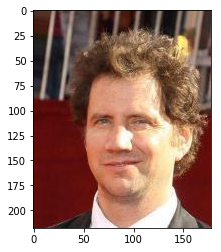

[0 1 2]


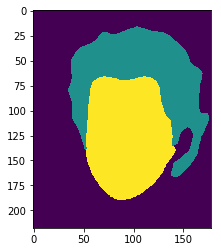

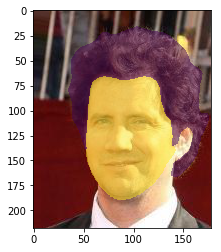

In [0]:
import random

pred_imgs = sorted([f for f in os.listdir(DIR_celebA_images)], key=lambda x: int(''.join(filter(str.isdigit, x))))
pred_masks = sorted([f for f in os.listdir(DIR_celebA_masks)], key=lambda x: int(''.join(filter(str.isdigit, x))))

rnum = random.randint(0, len(pred_imgs))

print(pred_imgs[rnum])

img = np.array(Image.open(DIR_celebA_images + pred_imgs[rnum]))
plt.imshow(img, interpolation='nearest')
plt.show()

mask = np.array(Image.open(DIR_celebA_masks + pred_masks[rnum]))
print(np.unique(mask))
plt.imshow(mask)
plt.show()

#show img overlayed with mask
img = np.array(Image.open(DIR_celebA_images + pred_imgs[rnum]))
plt.imshow(img, interpolation='nearest')

mask = np.array(Image.open(DIR_celebA_masks + pred_masks[rnum]))

mask = np.ma.masked_where(mask == 0, mask)
plt.imshow(mask, alpha = 0.5)
plt.show()